In [34]:
import math
import random
from collections import defaultdict
from pprint import pprint

import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.set_style(style='white')
sns.set_context(context='notebook', font_scale=1.3, rc={'figure.figsize':(16,9)})

In [35]:
df = pd.read_csv('polarity2.csv')
df = df[['Text', 'polarity_score', 'sentimen']]
df

,Text,polarity_score,sentimen
0,serius tanya stb kalau gabisa dipake tu kenapa...,-16,Negatif
1,kominfo bentuk satgas kecil kendali harga stb ...,7,Positif
2,kominfo sinergi bentuk satgas kecil kendali ha...,4,Positif
3,masyarakat tahu stb gratis bagi untuk masyarak...,-10,Negatif
4,stb gratis bagi siap syarat login link cek pen...,-1,Negatif
...,...,...,...
978,semua rajin diving mentab auto jebol stb hyper...,0,Positif
979,refresh modem refresh stb nya ubah bagaimana,4,Positif
980,kagak dibeliin stb,-4,Negatif
981,kata apa blithedose stb tema rumah sakit jiwa ...,-9,Negatif


In [36]:
df.sentimen.value_counts()

Negatif    545
Positif    438
Name: sentimen, dtype: int64

In [37]:
#Ekstrasi Fitur : Trem Presence dengan Smote
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

#perhitungan TF-IDF
vect = TfidfVectorizer(max_features=1000, binary=True)
x = vect.fit_transform(df.Text)

print(x)
#vect.get_feature_names()
#x.toarry()

sm = SMOTE()

  (0, 919)	0.19521707835359373
  (0, 874)	0.36088153868510087
  (0, 990)	0.24433897685043246
  (0, 186)	0.42467387598230644
  (0, 234)	0.38911009763361193
  (0, 362)	0.25363545813279365
  (0, 849)	0.07692397373734275
  (0, 886)	0.3824745845519737
  (0, 809)	0.4729309162433663
  (1, 392)	0.19280248995943366
  (1, 334)	0.2594061068124997
  (1, 912)	0.31911222485300883
  (1, 950)	0.4009332807737486
  (1, 268)	0.21016892024254105
  (1, 398)	0.38395387755489946
  (1, 378)	0.28896257330704156
  (1, 771)	0.38395387755489946
  (1, 94)	0.38395387755489946
  (1, 412)	0.24242670359365062
  (1, 849)	0.06521329035887302
  (2, 388)	0.3498808501828204
  (2, 386)	0.3498808501828204
  (2, 826)	0.3498808501828204
  (2, 392)	0.16825218144571696
  (2, 950)	0.3498808501828204
  :	:
  (981, 42)	0.2539236356775589
  (981, 849)	0.0624801164995617
  (982, 907)	0.26759258929158486
  (982, 237)	0.2474699810914011
  (982, 517)	0.2243156986653959
  (982, 815)	0.2474699810914011
  (982, 753)	0.25626012404153314
  (

In [38]:
#proses pelatihan
import os
import pickle
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

x = df.Text
y = df.sentimen

Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(y)

Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(x)
Train_X_Tfidf = Tfidf_vect.transform(x)

#classifier - algoritma - SVM
#fit the training dataset on the classifier
#train pembuatan model dataset SVM
SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
text_pickle=SVM.fit(Train_X_Tfidf,Train_Y)

files = open('SVM_classifier_24.pickle','wb')
pickle.dump(text_pickle, files)
files.close()

print('proses Training SVM Selesai')

proses Training SVM Selesai


In [39]:
model = open('SVM_classifier_24.pickle', 'rb')
svm_classifier = pickle.load(model)
svm_classifier

SVC(gamma='auto', kernel='linear')

              precision    recall  f1-score   support

     Negatif       0.85      0.88      0.87        60
     Positif       0.81      0.77      0.79        39

    accuracy                           0.84        99
   macro avg       0.83      0.83      0.83        99
weighted avg       0.84      0.84      0.84        99



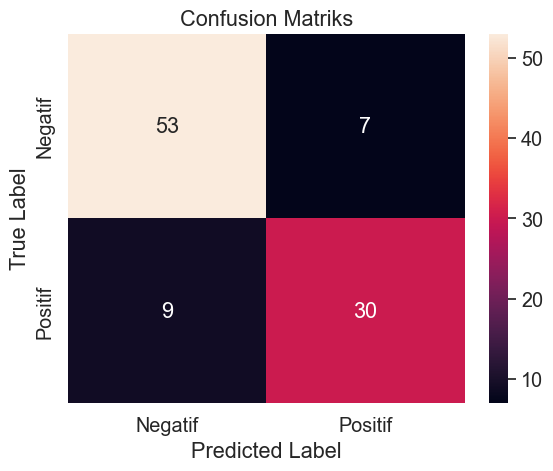

              precision    recall  f1-score   support

     Negatif       0.87      0.79      0.83        58
     Positif       0.74      0.83      0.78        41

    accuracy                           0.81        99
   macro avg       0.80      0.81      0.81        99
weighted avg       0.81      0.81      0.81        99



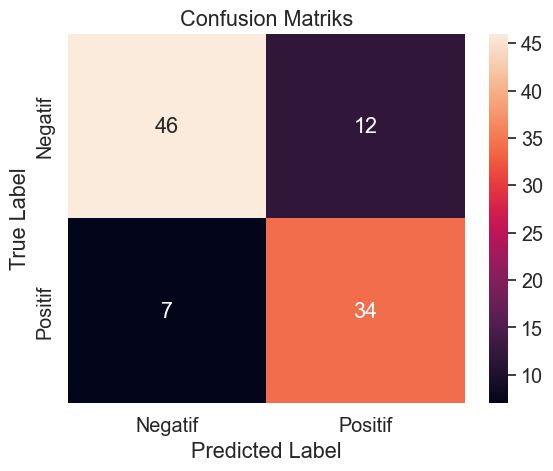

              precision    recall  f1-score   support

     Negatif       0.79      0.77      0.78        60
     Positif       0.66      0.69      0.68        39

    accuracy                           0.74        99
   macro avg       0.73      0.73      0.73        99
weighted avg       0.74      0.74      0.74        99



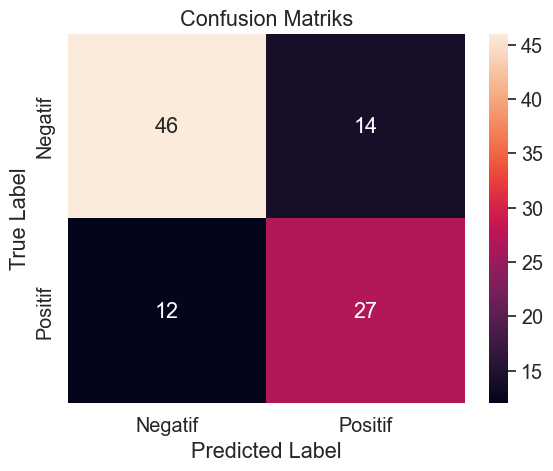

              precision    recall  f1-score   support

     Negatif       0.89      0.88      0.88        56
     Positif       0.84      0.86      0.85        43

    accuracy                           0.87        99
   macro avg       0.87      0.87      0.87        99
weighted avg       0.87      0.87      0.87        99



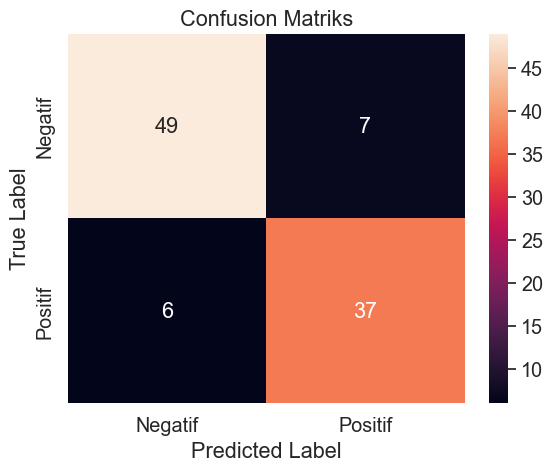

              precision    recall  f1-score   support

     Negatif       0.87      0.76      0.81        54
     Positif       0.75      0.87      0.80        45

    accuracy                           0.81        99
   macro avg       0.81      0.81      0.81        99
weighted avg       0.82      0.81      0.81        99



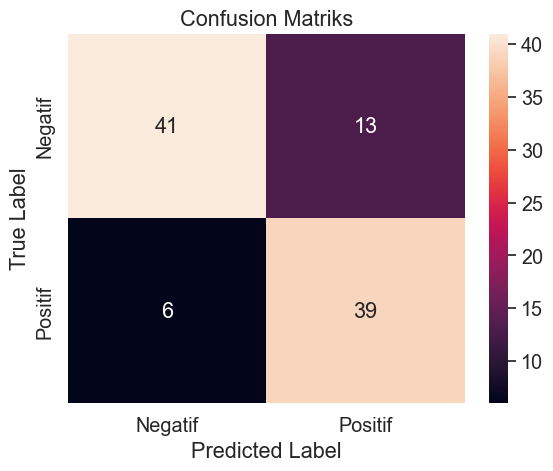

              precision    recall  f1-score   support

     Negatif       0.80      0.79      0.80        57
     Positif       0.72      0.74      0.73        42

    accuracy                           0.77        99
   macro avg       0.76      0.76      0.76        99
weighted avg       0.77      0.77      0.77        99



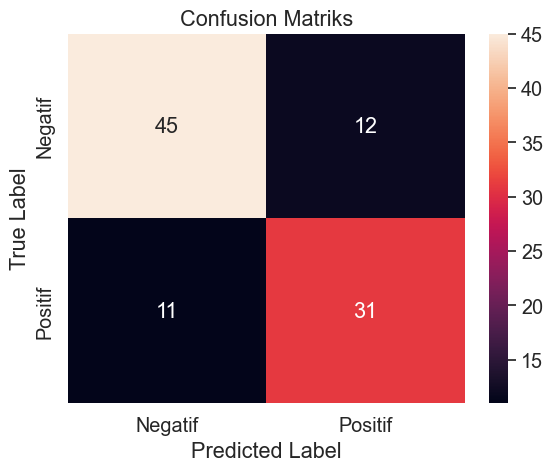

              precision    recall  f1-score   support

     Negatif       0.88      0.81      0.84        62
     Positif       0.71      0.81      0.76        37

    accuracy                           0.81        99
   macro avg       0.80      0.81      0.80        99
weighted avg       0.82      0.81      0.81        99



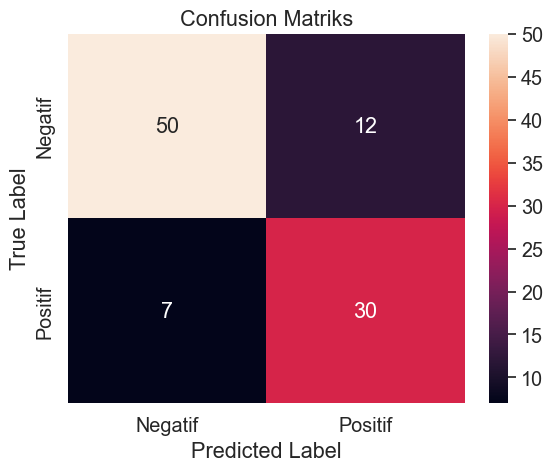

              precision    recall  f1-score   support

     Negatif       0.80      0.82      0.81        49
     Positif       0.82      0.80      0.81        50

    accuracy                           0.81        99
   macro avg       0.81      0.81      0.81        99
weighted avg       0.81      0.81      0.81        99



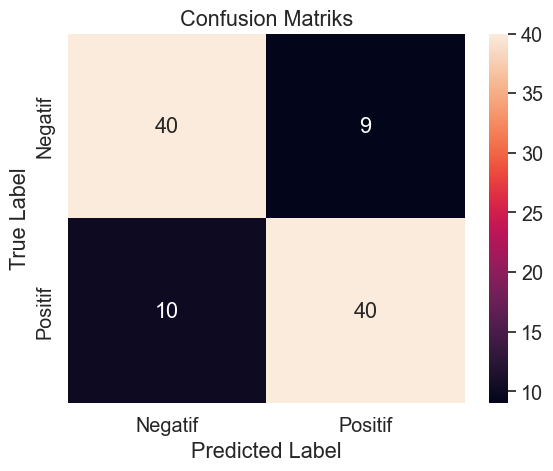

              precision    recall  f1-score   support

     Negatif       0.81      0.76      0.78        50
     Positif       0.77      0.82      0.79        49

    accuracy                           0.79        99
   macro avg       0.79      0.79      0.79        99
weighted avg       0.79      0.79      0.79        99



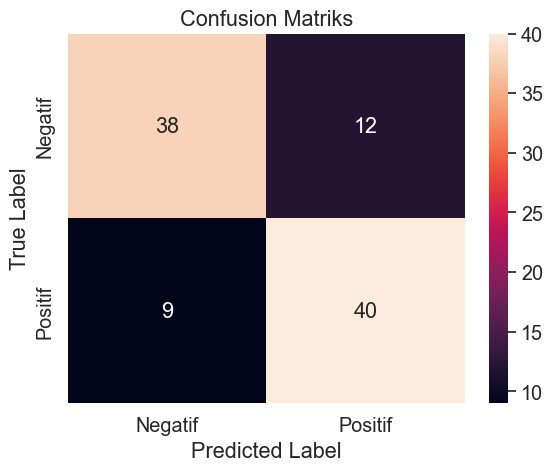

              precision    recall  f1-score   support

     Negatif       0.87      0.76      0.81        54
     Positif       0.75      0.87      0.80        45

    accuracy                           0.81        99
   macro avg       0.81      0.81      0.81        99
weighted avg       0.82      0.81      0.81        99



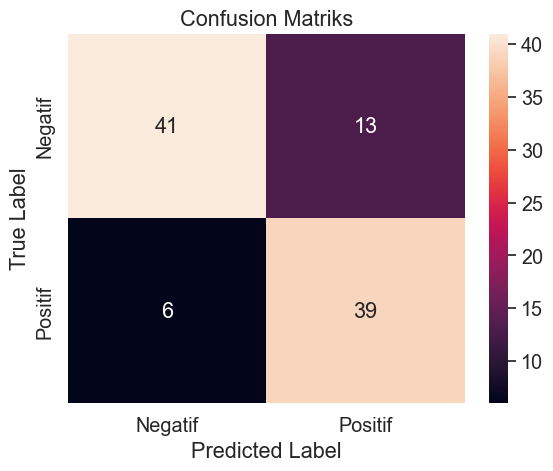

In [40]:
#proses Pengujian
#klasifikasi dengan term presence SMOTE dan oversample
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as pl

x = df.Text
y = df.sentimen
ss = ShuffleSplit(n_splits=10)
sm = SMOTE()
accs = []
fls = []
cms = []
for train_index, test_index in ss.split(x):    
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #fit vectorizer and transform x train, then transform x test
    X_train_vect = vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)
    #oversample
    X_train_res, y_train_res = sm.fit_resample(X_train_vect, y_train)
    #fit SVM on the vectorized x with y train labels,
    #predict new y labels using x test
    SVM.fit(X_train_res, y_train_res)
    y_pred = SVM.predict(X_test_vect)
    #determine test set accuracy and f1 score on this fold using the true y labels and predicted y labels
    accs.append(accuracy_score(y_test, y_pred))
    fls.append(f1_score(y_test, y_pred, average='weighted'))
    cms.append(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
   # Visualize the average confusion matrix using Seaborn's heatmap
    class_label = ["Negatif", "Positif"]
    df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=class_label, columns=class_label)
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title("Confusion Matriks")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

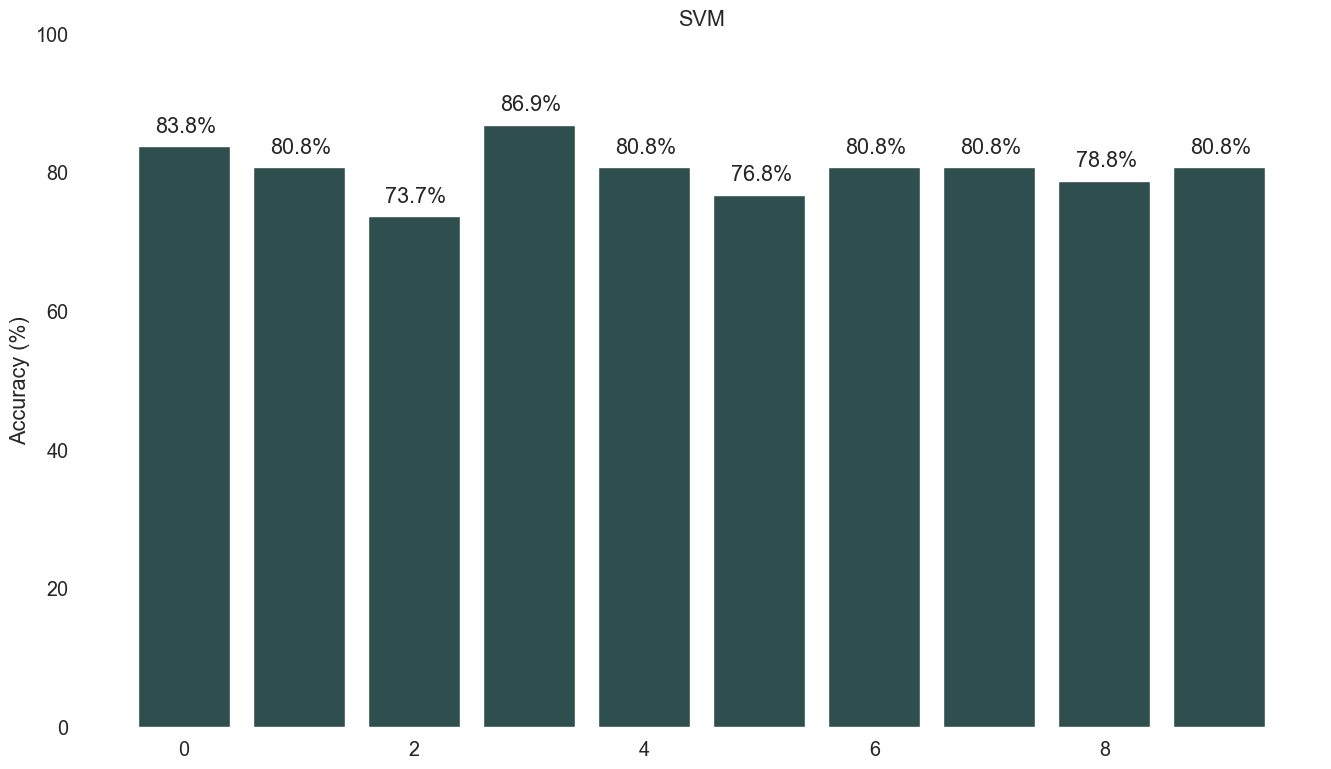

In [42]:
#cross validation
fig, (ax1) = plt.subplots( 1, sharex=True, figsize=(16,9))


acc_scores = [round(a * 100, 1) for a in accs]


x1 = np.arange(len(acc_scores))


ax1.bar(x1, acc_scores, color='#2F4F4F')


# place values on top bars
for i, v in enumerate(list(zip(acc_scores))):
    ax1.text(i - 0.25, v[0] + 2, str(v[0]) + '%')

ax1.set_ylabel('Accuracy (%)')
ax1.set_title('SVM')
ax1.set_ylim([0, 100])

sns.despine(bottom=True, left=True)

plt.show()

In [80]:
df.to_csv("data_traning.csv")